# Importación de la base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install google

In [ ]:
#pip install xgboost

In [ ]:
#pip install imblearn

In [ ]:
#pip install hyperopt

In [ ]:
#pip install graphviz

In [3]:
#Paquetes a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Machine Learning Packages
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree, plot_importance
import seaborn as sns
import math
import statistics 


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV

import graphviz

In [5]:
#Base de datos:
data = pd.read_excel('/content/drive/MyDrive/UIFCE/2020-II/Asistencias Docentes  2020-II/Modelo de pronóstico asistencias docentes/BD 2020-1.xlsx')
#data=pd.read_excel('/content/drive/My Drive/UIFCE/Actividades 2020-1/Base de datos asistencias docentes/Base de datos definitiva.xlsx')
data

,Id_Asistencia,Materia,Software,Profesor Encargado,Programa Curricular,Nivel académico,Fecha,Día de la semana,Horario,Número de participantes,Semestre,Semana del semestre
0,AD20170101,Fundamentos de Finanzas,Excel,Luis German Ome,Administración de Empresas,Pregrado,2017-02-06,lunes,18:00 - 20:00,NaN,2017-01,2
1,AD20170102,Estrategia de Mercados,Moodle,Alvaro Viña,Administración de Empresas,Pregrado,2017-02-08,miércoles,10:00 - 11:00,NaN,2017-01,2
2,AD20170103,Maestría en Administración,Moodle,Luis Alejandro Rodriguez,Maestría en Administración,Posgrado,2017-02-10,viernes,09:00 - 10:00,NaN,2017-01,2
3,AD20170104,Fundamentos de Finanzas,Excel,Luis German Ome,Administración de Empresas,Pregrado,2017-02-13,lunes,18:00 - 20:00,NaN,2017-01,3
4,AD20170105,Teoría Contemporanea de la Organización,Moodle,Alex Árias,Administración de Empresas,Pregrado,2017-02-13,lunes,10:00 - 11:00,NaN,2017-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...
366,AD2020164,Revista Intercambio,Inkscape,NaN,NaN,NaN,2020-06-09,martes,14:00 - 16:00,4.0,2020-01,15
367,AD2020165,Sistemas de Información Gerencial,SAP,Henry Martinez Sarmiento,Administración de Empresas,Pregrado,2020-06-10,miércoles,14:00 - 16:00,38.0,2020-01,15
368,AD2020166,Sistemas de Información Gerencial,SAP,Henry Martinez Sarmiento,Administración de Empresas,Pregrado,2020-06-17,miércoles,14:00 - 16:00,38.0,2020-01,16
369,AD2020167,Requisitos del Sistema Integrado de Gestión pa...,Nvivo,PEC,NaN,NaN,2020-06-20,sábado,11:00 - 13:00,NaN,2020-01,16


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Id_Asistencia            371 non-null    object        
 1   Materia                  371 non-null    object        
 2   Software                 371 non-null    object        
 3   Profesor Encargado       360 non-null    object        
 4   Programa Curricular      368 non-null    object        
 5   Nivel académico          355 non-null    object        
 6   Fecha                    371 non-null    datetime64[ns]
 7   Día de la semana         371 non-null    object        
 8   Horario                  326 non-null    object        
 9   Número de participantes  263 non-null    float64       
 10  Semestre                 371 non-null    object        
 11  Semana del semestre      371 non-null    int64         
dtypes: datetime64[ns](1), float64(1), in

# 1. Modelo de MCO

In [ ]:
#numero_asistencias = data.groupby("Fecha").count()[["Id_Asistencia"]]

In [ ]:
#numero_asistencias.rename(columns = {"Id_Asistencia": "Número de asistencias"}, inplace = True)

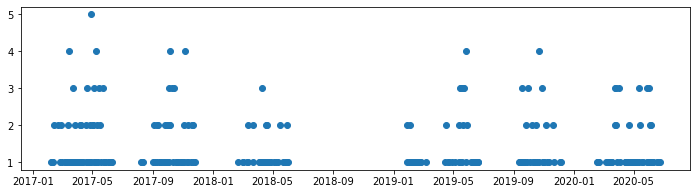

In [ ]:
#fig, ax = plt.subplots(figsize = (12,3))
#ax.scatter(numero_asistencias.index, numero_asistencias["Número de asistencias"])

In [ ]:
#info_explicativas = data[["Día de la semana", "Semestre", "Semana del semestre", "Fecha"]].set_index("Fecha")

In [ ]:
#dataset_modelo = pd.concat([numero_asistencias, info_explicativas], axis = 1)

In [ ]:
#dataset_modelo.head()

,Número de asistencias,Día de la semana,Semestre,Semana del semestre
Fecha,,,,
2017-02-06,1,lunes,2017-01,2
2017-02-08,1,miércoles,2017-01,2
2017-02-10,1,viernes,2017-01,2
2017-02-13,2,lunes,2017-01,3
2017-02-13,2,lunes,2017-01,3


In [ ]:
#dataset_modelo.drop_duplicates(inplace = True)

In [ ]:
#dataset_modelo["Semestre"].unique()

array(['2017-01', '2017-02', '2018-01', '2018-02', '2019-01', '2019-02',
       '2020-01'], dtype=object)

In [ ]:
# Mapear semestre:
#dataset_modelo["Semestre"] = dataset_modelo["Semestre"].map({"2017-01": 1, 
#                                                             "2017-02": 2, 
#                                                             "2018-01": 3, 
#                                                             "2018-02": 4, 
#                                                             "2019-01": 5, 
#                                                             "2019-02": 6,
#                                                             "2020-01": 7})

In [ ]:
# Convertir semana del semestre a categórica: 
#dataset_modelo["Semana del semestre"] = dataset_modelo["Semana del semestre"].astype(str)

In [ ]:
#dataset_modelo = pd.get_dummies(dataset_modelo)

In [ ]:
#Dependiente = dataset_modelo["Número de asistencias"]

In [ ]:
#Explicativas = dataset_modelo.loc[:, "Semestre":].drop(columns = ["Día de la semana_lunes", "Semana del semestre_2"])

In [ ]:
#Modelo = sm.OLS(Dependiente, sm.add_constant(Explicativas))
#Resultados = Modelo.fit()
#print(Resultados.summary())

                              OLS Regression Results                             
Dep. Variable:     Número de asistencias   R-squared:                       0.096
Model:                               OLS   Adj. R-squared:                  0.003
Method:                    Least Squares   F-statistic:                     1.036
Date:                   Sat, 14 Nov 2020   Prob (F-statistic):              0.421
Time:                           17:54:59   Log-Likelihood:                -287.70
No. Observations:                    258   AIC:                             625.4
Df Residuals:                        233   BIC:                             714.2
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

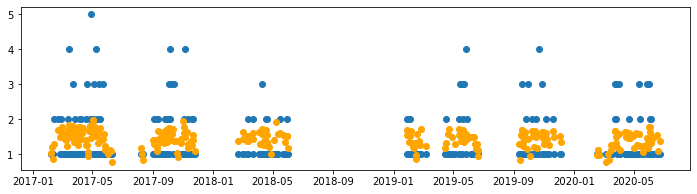

In [ ]:
#fig, ax = plt.subplots(figsize = (12,3))
#ax.scatter(numero_asistencias.index, numero_asistencias["Número de asistencias"])
#ax.scatter(Explicativas.index, Resultados.predict(), color = 'orange')

In [ ]:
#Explicativas = Explicativas[['Día de la semana_jueves', 'Día de la semana_martes',
                            'Día de la semana_miércoles', 'Día de la semana_sábado',
                            'Día de la semana_viernes', 'Semana del semestre_10',
                            'Semana del semestre_11', 'Semana del semestre_12',
                            'Semana del semestre_13', 'Semana del semestre_14',
                            'Semana del semestre_15', 'Semana del semestre_16',
                            'Semana del semestre_17', 'Semana del semestre_18',
                            'Semana del semestre_19', 'Semana del semestre_3',
                            'Semana del semestre_4', 'Semana del semestre_5',
                            'Semana del semestre_6', 'Semana del semestre_7',
                            'Semana del semestre_8', 'Semana del semestre_9']]

In [ ]:
#Explicativas.columns

Index(['Día de la semana_jueves', 'Día de la semana_martes',
       'Día de la semana_miércoles', 'Día de la semana_sábado',
       'Día de la semana_viernes', 'Semana del semestre_10',
       'Semana del semestre_11', 'Semana del semestre_12',
       'Semana del semestre_13', 'Semana del semestre_14',
       'Semana del semestre_15', 'Semana del semestre_16',
       'Semana del semestre_17', 'Semana del semestre_18',
       'Semana del semestre_19', 'Semana del semestre_3',
       'Semana del semestre_4', 'Semana del semestre_5',
       'Semana del semestre_6', 'Semana del semestre_7',
       'Semana del semestre_8', 'Semana del semestre_9'],
      dtype='object')

# 2. Regresión Poisson:

In [7]:
#from patsy import dmatrices

In [8]:
#data_poisson = numero_asistencias
#ds = numero_asistencias.index.to_series()
#data_poisson['Mes'] = ds.dt.month
#data_poisson['Dia_de_la_semana'] = ds.dt.dayofweek
#data_poisson['Dia'] = ds.dt.day
#data_poisson.rename(columns = {"Número de asistencias": "Numero_de_asistencias"}, 
#                    inplace = True)

NameError: ignored

In [ ]:
#data_poisson

In [ ]:
#expr = """Numero_de_asistencias ~ Dia  + Dia_de_la_semana + Mes"""

In [ ]:
#y_train, X_train = dmatrices(expr, data_poisson, return_type='dataframe')

In [ ]:
#Modelo_Poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson())
#Resultados_Poisson = Modelo_Poisson.fit()
#print(Resultados_Poisson.summary())

In [ ]:
#Predicciones_Poisson = Resultados_Poisson.get_prediction(X_train)
#Predicciones_Poisson_summary_frame = Predicciones_Poisson.summary_frame()

In [ ]:
#prediccion_de_cuenta = Predicciones_Poisson_summary_frame['mean']
#verdadera_cuenta = y_train['Numero_de_asistencias']
#fig, ax = plt.subplots(figsize = (12,3))
#fig.suptitle('Predicción vs verdaderos valores')
#ax.scatter(X_train.index, prediccion_de_cuenta, color = 'red', label='Predicción')
#ax.scatter(X_train.index, verdadera_cuenta, color = 'darkblue', label='Verdaderos')
#plt.legend()
#plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize = (8,5))
#fig.suptitle('Predicción vs verdaderos valores')
#ax.scatter(prediccion_de_cuenta, verdadera_cuenta, color = 'green')
#plt.show()

# 3. Regresión logística:

In [ ]:
#Dependiente = dataset_modelo[["Número de asistencias"]]

In [ ]:
#Explicativas.head()

,Día de la semana_jueves,Día de la semana_martes,Día de la semana_miércoles,Día de la semana_sábado,Día de la semana_viernes,Semana del semestre_10,Semana del semestre_11,Semana del semestre_12,Semana del semestre_13,Semana del semestre_14,...,Semana del semestre_17,Semana del semestre_18,Semana del semestre_19,Semana del semestre_3,Semana del semestre_4,Semana del semestre_5,Semana del semestre_6,Semana del semestre_7,Semana del semestre_8,Semana del semestre_9
Fecha,,,,,,,,,,,,,,,,,,,,,
2017-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-08,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2017-02-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Dependiente["Categoría"] = 1
#Dependiente["Categoría"] = Dependiente["Categoría"].where(Dependiente["Número de asistencias"]>2, 0)
#Dependiente[Dependiente['Categoría']==1]

<ipython-input-39-cd2f4cece594>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dependiente["Categoría"] = 1
<ipython-input-39-cd2f4cece594>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dependiente["Categoría"] = Dependiente["Categoría"].where(Dependiente["Número de asistencias"]>2, 0)


,Número de asistencias,Categoría
Fecha,,
2017-03-15,4,1
2017-03-22,3,1
2017-04-20,3,1
2017-04-27,5,1
2017-05-04,3,1
2017-05-08,4,1
2017-05-15,3,1
2017-05-22,3,1
2017-10-02,3,1


In [ ]:
#Var_Dependiente = Dependiente["Categoría"]

In [ ]:
# Balanceo de clases:

In [ ]:
#pip install imblearn --user

In [ ]:
#from imblearn.over_sampling import SMOTE

In [ ]:
#os = SMOTE(random_state=0)

In [ ]:
#X_os, Y_os = os.fit_sample(Explicativas, Var_Dependiente)
#Explicativas
#Var_Dependiente

,Día de la semana_jueves,Día de la semana_martes,Día de la semana_miércoles,Día de la semana_sábado,Día de la semana_viernes,Semana del semestre_10,Semana del semestre_11,Semana del semestre_12,Semana del semestre_13,Semana del semestre_14,...,Semana del semestre_17,Semana del semestre_18,Semana del semestre_19,Semana del semestre_3,Semana del semestre_4,Semana del semestre_5,Semana del semestre_6,Semana del semestre_7,Semana del semestre_8,Semana del semestre_9
Fecha,,,,,,,,,,,,,,,,,,,,,
2017-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-08,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2017-02-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-09,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-10,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#X_os=pd.DataFrame(X_os,columns=Explicativas.columns)

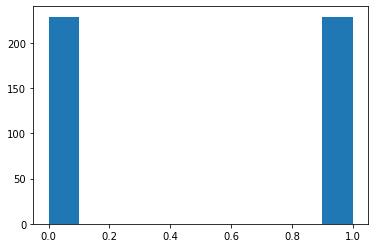

In [ ]:
# clases balanceadas:
#fig, ax = plt.subplots()
#ax.hist(Y_os)
#plt.show()

In [ ]:
#ModeloLogit = sm.Logit(Y_os, sm.add_constant(X_os))
#ResultadosLogit = ModeloLogit.fit(solver='lbfgs')
#print(ResultadosLogit.summary())

In [ ]:
#Predicciones = ResultadosLogit.predict(sm.add_constant(Explicativas))

In [ ]:
#Predicciones = pd.DataFrame({"Predicción puntual":Predicciones})

In [ ]:
#Predicciones["Categoría"] = 0

In [ ]:
#for i in range(len(Predicciones)):
#    if Predicciones["Predicción puntual"][i] > 0.5:
#        Predicciones["Categoría"][i] = 1
#    else: 
#        Predicciones["Categoría"][i] = 0

In [ ]:
#from sklearn.metrics import confusion_matrix

In [ ]:
#matriz_confusion = confusion_matrix(Var_Dependiente, Predicciones["Categoría"])

In [ ]:
#Originales_Prediccion = pd.concat([Predicciones, pd.DataFrame({"Categoría original": Var_Dependiente})], axis = 1)

In [ ]:
#Originales_Prediccion["Estado"] = "Ninguno"
#for i in range(Originales_Prediccion.shape[0]):
#    if Originales_Prediccion.iloc[i, 1] == Originales_Prediccion.iloc[i,2]:
#        Originales_Prediccion.iloc[i, 3] = True
#    else:
#        Originales_Prediccion.iloc[i, 3] = False

In [ ]:
#print("Predicciones correctas: ", Originales_Prediccion["Estado"].sum())
#print("Accuracy: ", round((((Originales_Prediccion["Estado"].sum())/Originales_Prediccion.shape[0])*100),2), "%")
#print("Verdaderos positivos: ", matriz_confusion[1][1])
#print("Verdaderos negativos: ", matriz_confusion[0][0])
#print("Falsos positivos: ", matriz_confusion[0][1])
#print("Falsos negativos: ", matriz_confusion[1][0])

In [ ]:
#import seaborn as sns

In [ ]:
###fig, ax = plt.subplots()
#sns.heatmap(matriz_confusion, annot = True, square = True, 
#            cmap = "Blues", vmin = 0, fmt = "g")
#ax.set(xlabel = "Predicción", ylabel = "Real", 
#       title = "Matriz de confusión")
#plt.show()

In [ ]:
#from sklearn.metrics import classification_report

In [ ]:
#X_os

In [ ]:
#print(classification_report(Var_Dependiente, Predicciones["Categoría"]))

**Recall**:
\begin{equation}
\frac{TP}{TP+FN}
\end{equation}

**Precision**:
\begin{equation}
\frac{TN}{TN+FP}
\end{equation}

## Re-estructuración de variables (train-test)

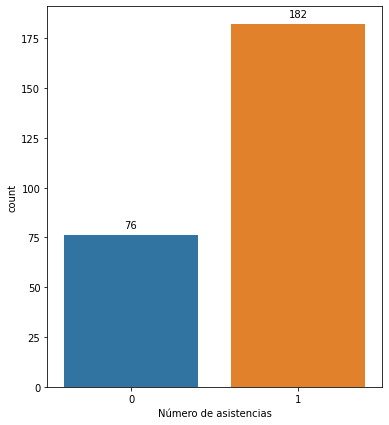

In [9]:
data = pd.read_excel('/content/drive/MyDrive/UIFCE/2020-II/Asistencias Docentes  2020-II/Modelo de pronóstico asistencias docentes/BD 2020-1.xlsx')
numero_asistencias = data.groupby("Fecha").count()[["Id_Asistencia"]]
numero_asistencias.rename(columns = {"Id_Asistencia": "Número de asistencias"}, inplace = True)
info_explicativas = data[["Día de la semana", "Semestre", "Semana del semestre", "Fecha"]].set_index("Fecha")
dataset_modelo = pd.concat([numero_asistencias, info_explicativas], axis = 1)
dataset_modelo.drop_duplicates(inplace = True)

dataset_modelo["Número de asistencias"] = dataset_modelo["Número de asistencias"].where(dataset_modelo["Número de asistencias"]>=2, 1)
dataset_modelo["Número de asistencias"] = dataset_modelo["Número de asistencias"].where(dataset_modelo["Número de asistencias"] <2, 0)
dataset_modelo["Semestre"] = dataset_modelo["Semestre"].map({"2017-01": 1, 
                                                             "2017-02": 2, 
                                                             "2018-01": 3, 
                                                             "2018-02": 4, 
                                                             "2019-01": 5, 
                                                             "2019-02": 6,
                                                             "2020-01": 7,
                                                             "2020-02": 8})
dataset_modelo["Día de la semana"] = dataset_modelo["Día de la semana"].map({"lunes": 1, 
                                                             "martes": 2, 
                                                             "miércoles": 3, 
                                                             "jueves": 4, 
                                                             "viernes": 5, 
                                                             "sábado": 6})
y = dataset_modelo["Número de asistencias"]
X = dataset_modelo.drop(columns = ["Número de asistencias"])

#Muestra desbalanceada:

plt.figure(figsize=(6, 7))
splot = sns.countplot('Número de asistencias', data=dataset_modelo)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
               textcoords = 'offset points')

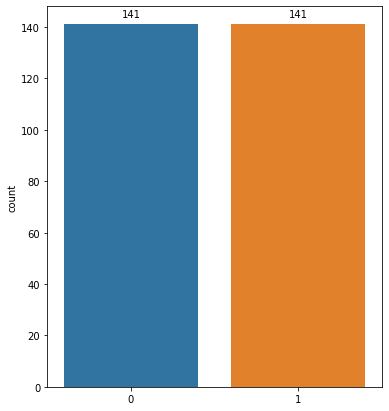

In [52]:
# Muestra Y Balanceada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

sm = SMOTE(sampling_strategy='minority',  k_neighbors=1)
X_train, y_train = sm.fit_sample(X_train, y_train)
plt.figure(figsize=(6, 7))
splot = sns.countplot(y_train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
               textcoords = 'offset points')
  
X_train = pd.DataFrame(data = X_train,   
                  columns =  X_test.columns.to_list())

# Creación de los modelos

Para que la creación de los modelos pudiera realizarse, unas líneas arriba se realizó la transformación de las categorías que comprendían la variable dependiente "Numero de Asistencias" de manera que se crea una variable binaria. Cuando se hable de 2 o más asistencias se observará el valor de "1" y en caso contrario "0".

### <center> Regresión Logística </center>

In [11]:
#logit = LogisticRegression(solver='lbfgs')
#logit_model = logit.fit(X_train,y_train)
#logit_pred = logit_model.predict_log_proba(X_test)
#logit_roc_auc = roc_auc_score(y_test, logit_pred[:,1])

### <center> Ingenuo de Bayes [Naive Bayes] </center>

In [12]:
#def hyperopt_train_test(params):
#    clf = BernoulliNB(**params)
#    return cross_val_score(clf, X_train, y_train).mean()
#space4knn = {
#    'alpha': hp.uniform('alpha', 0.0, 2.0)
#}
#
#def f(params):
#    acc = hyperopt_train_test(params)
#    return {'loss': -acc, 'status': STATUS_OK}
##trials = Trials()
#best = fmin(f, space4knn, algo=tpe.suggest, max_evals=500, trials=trials)
#print('best:')
#print(best)

100%|██████████| 500/500 [00:05<00:00, 85.50it/s, best loss: -0.4964912280701754]
best:
{'alpha': 1.877279012115285}


In [13]:
#NaiveBayes = BernoulliNB(alpha = best.get('alpha'))
#NB_model = NaiveBayes.fit(X_train,y_train)
#NB_pred = NB_model.predict_proba(X_test)
#NB_roc_auc = roc_auc_score(y_test, NB_pred[:,1])

### <center> Árbol de Decisión [Decision Tree (DT)] </center>

In [ ]:
#def hyperopt_train_test(params):
#    clf = DecisionTreeClassifier(**params)
#    return cross_val_score(clf, X_train, y_train).mean()
#space4dt = {
#    'max_depth': hp.choice('max_depth', range(1,20)),
#    'max_features': hp.choice('max_features', range(1,4)),
#    'criterion': hp.choice('criterion', ["gini", "entropy"])
#}
#def f(params):
#    acc = hyperopt_train_test(params)
#    return {'loss': -acc, 'status': STATUS_OK}
#
#trials = Trials()
#best = fmin(f, space4dt, algo=tpe.suggest, max_evals=500, trials=trials)
#print('best:')
#print(best)

In [ ]:
#DT = DecisionTreeClassifier(criterion = 'gini' if best.get('criterion') == 0 else 'entropy', max_depth = best.get('max_depth'), max_features = None if best.get('max_features') == 0 else best.get('max_features'))
#DT.fit(X_train,y_train)
#DT_pred = DT.predict_proba(X_test)
#DT_roc_auc = roc_auc_score(y_test, DT_pred[:,1])

### <center> Bosque Aleatorio [Random Forest (RF)] </center>

In [ ]:
#def hyperopt_train_test(params):
#    clf = RandomForestClassifier(**params)
#    return cross_val_score(clf, X_train, y_train).mean()
#space4rf = {
#    'max_depth': hp.choice('max_depth', range(1,20)),
#    'max_features': hp.choice('max_features', range(1,4)),
#    'n_estimators': hp.choice('n_estimators', range(1,20)),
#    'criterion': hp.choice('criterion', ["gini", "entropy"])
#}
#best = 0
#def f(params):
#    acc = hyperopt_train_test(params)
#    return {'loss': -acc, 'status': STATUS_OK}
#trials = Trials()
#best = fmin(f, space4rf, algo=tpe.suggest, max_evals=500, trials=trials)
#print('best:')
#print(best)

In [ ]:
#RF = RandomForestClassifier(criterion = 'gini' if best.get('criterion') == 0 else 'entropy', max_depth = best.get('max_depth'), max_features = None if best.get('max_features') == 0 else best.get('max_features'), n_estimators = best.get('n_estimators'))
#RF.fit(X_train,y_train)
#RF_pred = RF.predict_proba(X_test)
#RF_roc_auc = roc_auc_score(y_test, RF_pred[:,1])

### <center> Aumento del Gradiente [Gradient Boosting (GB)] </center>

In [ ]:
#def hyperopt_train_test(params):
#    clf = GradientBoostingClassifier(**params)
#    return cross_val_score(clf, X_train, y_train).mean()
#space4rf = {
#    'max_depth': hp.choice('max_depth', range(1,20)),
#    'max_features': hp.choice('max_features', range(1,4)),
#    'n_estimators': hp.choice('n_estimators', range(1,20)),
#    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1))}
#best = 0
#def f(params):
#    acc = hyperopt_train_test(params)
#    return {'loss': -acc, 'status': STATUS_OK}
#trials = Trials()
#best = fmin(f, space4rf, algo=tpe.suggest, max_evals=500, trials=trials)
#print('best:')
#print(best)

In [ ]:
#GB = GradientBoostingClassifier(learning_rate = best.get('learning_rate'), max_depth = best.get('max_depth'), max_features = None if best.get('max_features') == 0 else best.get('max_features'), n_estimators = best.get('n_estimators'))
#GB.fit(X_train, y_train)
#GB_pred = GB.predict_proba(X_test)
#GB_roc_auc = roc_auc_score(y_test, GB_pred[:,1])

### <center> XgBoost </center>

In [15]:
def hyperopt_train_test(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1))
}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=500, trials=trials)
print('best:')
print(best)

100%|██████████| 500/500 [00:26<00:00, 18.87it/s, best loss: -0.8023593466424682]
best:
{'learning_rate': 0.13563025062249195, 'max_depth': 15, 'n_estimators': 18}


In [56]:
#XGB=xgb.XGBClassifier(learning_rate = best.get('learning_rate'), max_depth = best.get('max_depth'), n_estimators = best.get('n_estimators'))
#XGB.fit(X_train,y_train)
#XGB_pred=XGB.predict_proba(X_test)
#XGB_roc_auc=roc_auc_score(y_test,XGB_pred[:,1])

# Comparación de los modelos

<h3><b> AUC </b></h3>

Ahora bien, para realizar la comparación de los modelos se revisará el rendimiento de cada modelo bajo el cálculo de la <b> Curva de de Característica Operativa del Recepto (ROC curve)</b> de manera que el modelo que alcance el mayor valor respecto a la <b>Tasa de Verdaderos Positivos (TPR)</b> frente a la <b>Tasa de Falsos Positivos(FPR)</b> en la curva de decisión será tomado como el modelo que mejor pronostica la variable de respuesta binaria en nuestro caso.

No obstante, revisar cada asignación de decisión posible en el <b>trade-off</b> entre la <b>TPR</b> y la <b>FPR</b> sería ineficiente. Por ello se procede a añadir el <b>Área Bajo la curva ROC (Under ROC curve Area - AUC)</b> mediante la cual se puede medir toda el área bidimensional por debajo de la curva ROC. El valor resultante para el <b>AUC</b> será interpretado como la probabilidad de que cada modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. Es decir, un modelo cuyas predicciones siempre resultan incorrectas tiene un <b>AUC</b> de 0, mientras que otro modelo cuyas predicciones siempre resultan correctas tiene un <b>AUC</b> de 1.

In [ ]:
#def MeanSquareError(y_obs, y_pred):
#    ''' This function calculates efficiency of any model 
#    y_pred: estimate value
#    y_obs: real value 
#    # '''
#    mse = pow(y_obs - y_pred, 2).sum() / y_obs.shape[1]
#    return mse

#print('     Modelo        ', '  AUC Value')
#print('Regresión Logit  : ',logit_roc_auc)
#print('Naïve Bayes      : ',NB_roc_auc   )
#print('Árbol de decisión: ',DT_roc_auc   )
#print('Random Forest    : ',RF_roc_auc   )
#print('Gradient Boosting: ',GB_roc_auc   )
#print('Xg Boost:          ',XGB_roc_auc  )

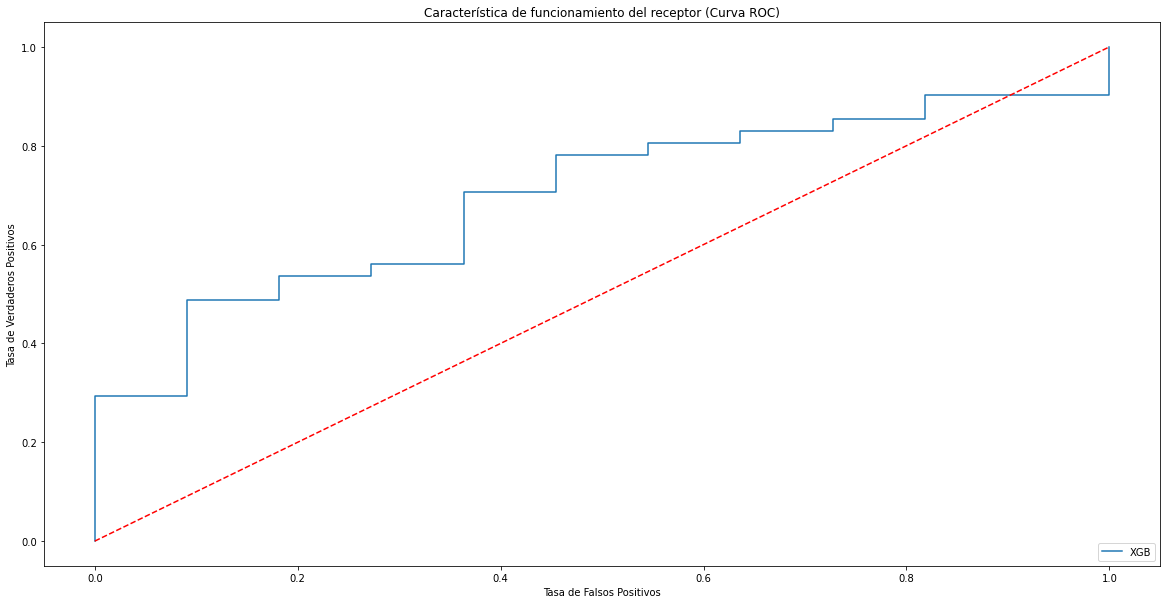

In [57]:
#logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logit_pred[:,1])
#NB_fpr, NB_tpr, thresholds       = roc_curve(y_test, NB_pred[:,1])
#DT_fpr, DT_tpr, thresholds       = roc_curve(y_test, DT_pred[:,1])
#RF_fpr, RF_tpr, thresholds       = roc_curve(y_test, RF_pred[:,1])
#GB_fpr, GB_tpr, thresholds       = roc_curve(y_test, GB_pred[:,1])
#XGB_fpr, XGB_tpr, thresholds     = roc_curve(y_test, XGB_pred[:,1])

#plt.figure(figsize=(20,10))
#plt.plot(logit_fpr, logit_tpr, label='Regresión Logística')
#plt.plot(NB_fpr, NB_tpr, label='NB')
#plt.plot(DT_fpr, DT_tpr, label='DT')
#plt.plot(RF_fpr, RF_tpr, label='RF')
#plt.plot(GB_fpr, GB_tpr, label='GB')
#plt.plot(XGB_fpr, XGB_tpr, label='XGB')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlabel('Tasa de Falsos Positivos')
#plt.ylabel('Tasa de Verdaderos Positivos')
#plt.title('Característica de funcionamiento del receptor (Curva ROC)')
#plt.legend(loc="lower right")

# Importancia de las variables

Siendo <b>Random Forest</b> nuestro modelo ganador vale la pena revisar la importancia de las variables para garantizar una selección coherente al menos frente a nuestro segundo lugar <b>XGBoost</b>:

<h3><b> Random Forest </b></h3>

In [ ]:
#feature_importance = RF.feature_importances_
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
#fig = plt.figure(figsize=(12, 6))
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(X.columns)[sorted_idx])
#plt.title('Importancia de las Variables en el Modelo (Random Forest))')

<h3><b> XGBoost </b></h3>

Text(0.5, 1.0, 'Importancia de las Variables en el Modelo (XGB))')

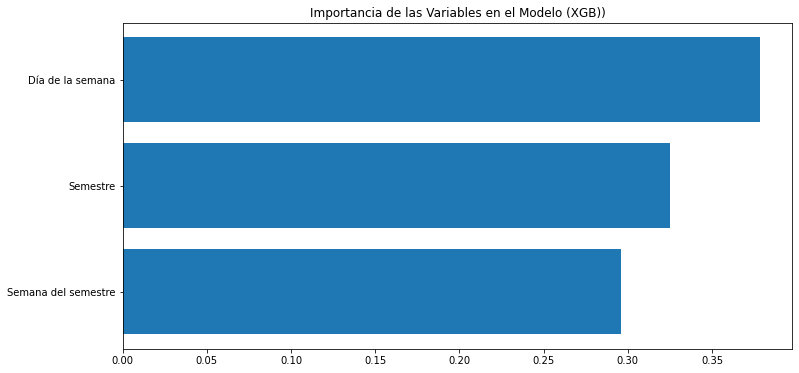

In [58]:
#feature_importance = XGB.feature_importances_
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5
#fig = plt.figure(figsize=(12, 6))
#plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(X.columns)[sorted_idx])
#plt.title('Importancia de las Variables en el Modelo (XGB))')

Se observa que a pesar de tener el valor F1_Score más alto, Random Forest está desperdiciando valor de nuestra variable teóricamente más importante (Día de la semana), dándole más importancia al "Semestre" lo cual resulta incoherente. Sucede así por la configuración misma del modelo y la poca cantidad de datos actuales que se tienen para alimentar al mismo.

Por este motivo se procede a elegir el modelo XGBoost el cual resulta más coherente en su asignación de relevancia y en sus resultados observados en la comparativa de los modelos estimados.

# Pronóstico con XGB

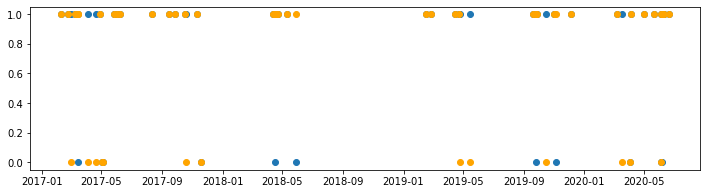

In [59]:
#comportamiento Y_obser vs Y_estimada
#lop = lambda t: 1 if t > 0.5 else 0
#XGB_pred[:,-1] = np.array([lop(xi) for xi in XGB_pred[:,-1]])
#fig, ax = plt.subplots(figsize = (12,3))
#ax.scatter(y_test.index, y_test)
#ax.scatter(y_test.index, XGB_pred[:,-1], color = 'orange')

Cargue y exportación de los datos para el siguiente semestre

In [83]:
NUEVA = pd.read_excel('/content/drive/MyDrive/UIFCE/2020-II/Asistencias Docentes  2020-II/Modelo de pronóstico asistencias docentes/fechas a pronosticar.xlsx')
NUEVA = NUEVA[['Día de la semana', 'Semestre', 'Semana del semestre']].set_index(NUEVA['Fecha'])
NUEVA.head()

,Día de la semana,Semestre,Semana del semestre
Fecha,,,
2021-02-22,1,8,1
2021-02-23,2,8,1
2021-02-24,3,8,1
2021-02-25,4,8,1
2021-02-26,5,8,1


Ya cargados ahora se calculará el pronóstico y se exportará el archivo como CSV para su fácil lectura

In [120]:
#aquí se ejecuta el modelo para pronosticar el siguiente semestre y se exporta el pronóstico al drive

XGB=xgb.XGBClassifier(learning_rate = best.get('learning_rate'), max_depth = best.get('max_depth'), n_estimators = best.get('n_estimators'))
XGB.fit(X,y) #aqui ya entra toda la data de semestres anteriores
XGB_pred=XGB.predict_proba(NUEVA)
lop = lambda t: 1 if t > 0.5 else 0
Estimacion = np.array([lop(xi) for xi in XGB_pred[:,-1]])
BASE = pd.concat([X, NUEVA]).merge(pd.concat([y, pd.DataFrame(Estimacion, index= NUEVA.index)]), left_index=True, right_index=True).rename(columns = {0:'Respuesta'})
BASE.to_csv('/content/drive/MyDrive/UIFCE/2020-II/Asistencias Docentes  2020-II/Modelo de pronóstico asistencias docentes/Pronostico para 2021-1.csv', index = True)
BASE.tail()

,Día de la semana,Semestre,Semana del semestre,Respuesta
Fecha,,,,
2021-06-29,2,8,19,1
2021-06-30,3,8,19,1
2021-07-01,4,8,19,1
2021-07-02,5,8,19,1
2021-07-03,6,8,19,1


# Uso del modelo

In [123]:
# def prediccion(dia, semana, semestre):
#     dia_de_referencia = "Día de la semana_"+ str(dia)
#     semana_de_referencia = "Semana del semestre_" + str(semana)
    
#     dias = ['Día de la semana_jueves', 'Día de la semana_martes',
#             'Día de la semana_miércoles', 'Día de la semana_sábado',
#             'Día de la semana_viernes']
    
#     semanas = ['Semana del semestre_10', 'Semana del semestre_11',
#                'Semana del semestre_12', 'Semana del semestre_13',
#                'Semana del semestre_14', 'Semana del semestre_15',
#                'Semana del semestre_16', 'Semana del semestre_17',
#                'Semana del semestre_18', 'Semana del semestre_19',
#                'Semana del semestre_3', 'Semana del semestre_4',
#                'Semana del semestre_5', 'Semana del semestre_6',
#                'Semana del semestre_7', 'Semana del semestre_8',
#                'Semana del semestre_9']
    
#     X = pd.DataFrame({'Día de la semana_jueves': [0], 'Día de la semana_martes': [0],
#                       'Día de la semana_miércoles': [0], 'Día de la semana_sábado': [0],
#                       'Día de la semana_viernes': [0], 'Semana del semestre_10': [0],
#                       'Semana del semestre_11': [0], 'Semana del semestre_12': [0],
#                       'Semana del semestre_13': [0], 'Semana del semestre_14': [0],
#                       'Semana del semestre_15': [0], 'Semana del semestre_16': [0],
#                       'Semana del semestre_17': [0], 'Semana del semestre_18': [0],
#                       'Semana del semestre_19': [0], 'Semana del semestre_3': [0],
#                       'Semana del semestre_4': [0], 'Semana del semestre_5': [0],
#                       'Semana del semestre_6': [0], 'Semana del semestre_7': [0],
#                       'Semana del semestre_8': [0], 'Semana del semestre_9': [0]})
#     Z = pd.DataFrame({'Día de la semana_jueves': [0], 'Día de la semana_martes': [0],
#                       'Día de la semana_miércoles': [0], 'Día de la semana_sábado': [0],
#                       'Día de la semana_viernes': [0], 'Semana del semestre_10': [0],
#                       'Semana del semestre_11': [0], 'Semana del semestre_12': [0],
#                       'Semana del semestre_13': [0], 'Semana del semestre_14': [0],
#                       'Semana del semestre_15': [0], 'Semana del semestre_16': [0],
#                       'Semana del semestre_17': [0], 'Semana del semestre_18': [0],
#                       'Semana del semestre_19': [0], 'Semana del semestre_3': [0],
#                       'Semana del semestre_4': [0], 'Semana del semestre_5': [0],
#                       'Semana del semestre_6': [0], 'Semana del semestre_7': [0],
#                       'Semana del semestre_8': [0], 'Semana del semestre_9': [0]})
    
#     Falso = pd.DataFrame({'Día de la semana_jueves': [1], 'Día de la semana_martes': [0],
#                           'Día de la semana_miércoles': [0], 'Día de la semana_sábado': [0],
#                           'Día de la semana_viernes': [0], 'Semana del semestre_10': [0],
#                           'Semana del semestre_11': [0], 'Semana del semestre_12': [0],
#                           'Semana del semestre_13': [0], 'Semana del semestre_14': [0],
#                           'Semana del semestre_15': [0], 'Semana del semestre_16': [0],
#                           'Semana del semestre_17': [0], 'Semana del semestre_18': [0],
#                           'Semana del semestre_19': [0], 'Semana del semestre_3': [0],
#                           'Semana del semestre_4': [0], 'Semana del semestre_5': [0],
#                           'Semana del semestre_6': [0], 'Semana del semestre_7': [0],
#                           'Semana del semestre_8': [0], 'Semana del semestre_9': [0]})
#     resultado = "Nada"
    
#     if dia_de_referencia in dias:
#         X[dia_de_referencia] = 1
#     else:
#         resultado = "Día incorrecto"
    
#     if semana_de_referencia in semanas:
#         X[semana_de_referencia] = 1
#     else:
#         resultado = "Semana incorrecta"
    
#     if resultado in ["Día incorrecto", "Semana incorrecta"]:
#         resultado_final = resultado
#     else:
#         X = pd.concat([X, Falso])
#         prediccion = ResultadosLogit.predict(sm.add_constant(X))
#         prediccion = prediccion.reset_index(drop = True)
#         prediccion = prediccion[0]
#         if prediccion > 0.5:
#             resultado_final = "Para este día se estiman más de dos asistencias"
#         else:
#             resultado_final = "Para este día se estiman dos o menos asistencias"
#     return(resultado_final)

In [ ]:
# PRONÓSTICO

#dia = input("Ingrese el día de la semana para el que desea realizar la predicción:")
#semana = input("Ingrese el número de la semana para el que desea realizar la predicción:")
#semestre=0
#prediccion(dia, semana,semestre)

#Nota: el día debe entrar en minúscula con la tilde respectiva.
#La semana debe ser superior a 2 y menor que 19